1. Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model & Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV # Kita pakai ini untuk tuning

# Evaluasi
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Mengatur style visualisasi
sns.set(style="whitegrid")
print("Semua library berhasil di-import.")

Semua library berhasil di-import.


mengimpor semua "alat" (library) yang di butuhkan.

pandas & numpy untuk mengelola data.

matplotlib & seaborn untuk membuat grafik (visualisasi).

sklearn untuk semua hal terkait machine learning: preprocessing (StandardScaler), model (RandomForestClassifier), dan evaluasi (accuracy_score, dll.).

2. Memuat Data

In [48]:
# Muat data training dan testing
df_train = pd.read_csv('/content/data_training.csv')
df_test = pd.read_csv('data_testing.csv')

 # Tampilkan setiap dataset
print("Data Training (5 Baris Pertama):")
print(df_train.head())

print("Data Testing (5 Baris Pertama):")
print(df_test.head())
df_train.info()

Data Training (5 Baris Pertama):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0      9.8        5  1366

Memuat dua file CSV:

data_training.csv: Berisi fitur (data kimia) dan label (quality). Data ini akan kita pakai untuk melatih model.

data_testing.csv: Hanya berisi fitur. Data inilah yang akan kita prediksi hasilnya.

df_train.info() penting untuk mengecek apakah ada data yang null (kosong) dan melihat tipe data setiap kolom.

3. Preprocessing (Scaling Data)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

#1. Scaling Data
print("Scaling Data")

# Simpan Id dari data testing
test_ids = df_test['Id']

# Hapus kolom 'Id' dari kedua dataset karena bukan fitur
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

# Pisahkan fitur (X) dan target (y) dari data training
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']

# Data testing (X_test) adalah df_test itu sendiri
X_test = df_test.copy()

# Pastikan urutan kolom di X_train dan X_test sama
X_test = X_test[X_train.columns]

print(f"Jumlah fitur: {len(X_train.columns)}")
print(f"Nama fitur: {list(X_train.columns)}")



Scaling Data
Jumlah fitur: 11
Nama fitur: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Simpan test_ids: simpan Id dari data tes untuk file submission nanti.

Hapus Id: Kolom Id tidak berguna untuk prediksi, jadi hapus dari df_train dan df_test.

Pisahkan X dan y: Kita memisahkan X_train (fitur) dan y_train (target) dari data training.


3. Preprocessing (Feature Scaling)

In [50]:
#2. Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit (belajar) scaler hanya pada data training (X_train)
scaler.fit(X_train)

# Transform (ubah) data training dan testing menggunakan scaler yang sama
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar mudah dilihat
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\n--- Data Training Setelah Scaling (5 Baris Pertama) ---")
print(X_train_scaled_df.head())

print("\n--- Data Berhasil Disiapkan dan Discaling ---")


--- Data Training Setelah Scaling (5 Baris Pertama) ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.565527          1.176198    -0.960627       -0.623616   0.147259   
1      -0.095215          0.254705    -0.242789       -0.314200  -0.201873   
2       1.080565         -0.555092     0.680145        0.072570   0.106185   
3       2.726657         -0.164156     1.449257        0.227278  -0.304559   
4       0.081152         -0.946029     0.269952       -0.236846  -0.119725   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.561759             -0.030890 -0.490363 -0.480901  -0.936887   
1            -0.367478              0.600550  0.004342 -0.151932  -0.877102   
2            -0.270338              0.190114  0.867443 -0.612489  -0.099897   
3            -0.853180             -0.693903  1.804225 -1.467809   0.139242   
4             1.575327              1.042558 -0.153543 -0.086138   0.378382   


StandardScaler: Ini adalah feature scaling.

Kenapa perlu? Fitur seperti total sulfur dioxide (nilai > 50) dan chlorides (nilai < 0.1) punya rentang yang sangat berbeda. Scaling membuat semua fitur punya "skala" yang sama (rata-rata 0, std dev 1) sehingga model tidak bias.

fit (belajar) scaler HANYA pada X_train. Kita dilarang "belajar" dari data tes.

Kemudian transform (mengubah) X_train dan X_test menggunakan statistik yang sudah dipelajari dari X_train tadi.

4. Evaluasi Model (Mencoba Gradient Boosting)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # <-- Ganti ke GB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluasi Model Gradient Boosting (Metode Validasi)")

# 1. Pisahkan data training menjadi set train (untuk melatih) dan set validasi (untuk menguji)
X_train_eval, X_val, y_train_eval, y_val = train_test_split(
    X_train_scaled_df,  # <- Data yang sudah di-scale
    y_train,
    test_size=0.2,      # <- 20% untuk validasi
    random_state=42,
    stratify=y_train    # <- Menjaga proporsi kelas
)

print(f"Data untuk evaluasi model (train): {X_train_eval.shape}")
print(f"Data untuk evaluasi model (validasi): {X_val.shape}")



Evaluasi Model Gradient Boosting (Metode Validasi)
Data untuk evaluasi model (train): (685, 11)
Data untuk evaluasi model (validasi): (172, 11)



--- Melatih Model... ---
--- Model Selesai Dilatih ---

--- Hasil Evaluasi Model (Gradient Boosting) pada Data Validasi ---
Akurasi Model: 62.21%

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.20      0.25         5
           5       0.69      0.74      0.72        73
           6       0.58      0.62      0.60        68
           7       0.60      0.41      0.49        22
           8       0.50      0.33      0.40         3

    accuracy                           0.62       172
   macro avg       0.45      0.38      0.41       172
weighted avg       0.62      0.62      0.62       172


Confusion Matrix:


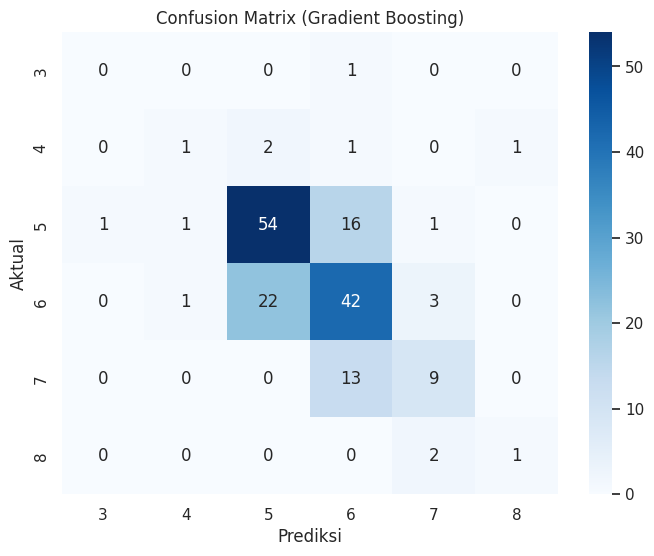

In [52]:
# 2. Buat model klasifikasi (Gradient Boosting Classifier)
model_eval = GradientBoostingClassifier(  # <-- Model diganti
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Latih model menggunakan data training (X_train_eval, y_train_eval)
print("\n--- Melatih Model... ---")
model_eval.fit(X_train_eval, y_train_eval)
print("--- Model Selesai Dilatih ---")

# Lakukan prediksi pada data validasi (X_val)
y_pred_val = model_eval.predict(X_val)

# Evaluasi Model
print("\n--- Hasil Evaluasi Model (Gradient Boosting) pada Data Validasi ---")

# Akurasi
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred_val)

# Visualisasi Confusion Matrix
try:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_train.unique()),
                yticklabels=sorted(y_train.unique()))
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix (Gradient Boosting)')
    plt.show()
except Exception as e:
    print(f"\nTidak bisa menampilkan plot: {e}. Lanjutkan tanpa plot.")
    print(cm)

Bertujuan untuk menguji seberapa bagus model.

train_test_split (Lagi): membagi data training kita (yang 800 baris) menjadi 80% (sekitar 640 baris) untuk X_train_eval dan 20% (sekitar 160 baris) untuk X_val (validasi).

melatih model (model_eval) pada 640 baris, lalu mengujinya pada 160 baris yang belum pernah ia lihat. Ini memberi skor akurasi yang jujur.

Model: menggunakan GradientBoostingClassifier, model ensemble yang kuat.

Hasil: Model ini memberikan akurasi 62% pada data validasi. Ini adalah skor yang realistis dan jujur untuk masalah 6 kelas yang sulit.

**5. Pelatihan Model Final (Random Forest)**

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

print("Prediksi Data Uji")

# Definisikan Model Final
final_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# Latih ulang model pada Seluruh data training
final_model.fit(X_train_scaled_df, y_train)
print("Model Final Selesai Dilatih")


Prediksi Data Uji
Model Final Selesai Dilatih


Setelah tahu perkiraan akurasi(sekitar 62%), sekarang saatnya membuat model terbaik untuk diserahkan.

Model Final: dipilih RandomForestClassifier.

class_weight='balanced': Ini adalah parameter kunci. Ini memberi tahu model untuk lebih "peduli" pada kelas minoritas (seperti quality 3 atau 8) dan tidak hanya fokus pada kelas mayoritas (5 dan 6).

Latih pada Semua Data: Perhatikan, akan dilatih final_model pada X_train_scaled_df (seluruh 800 data training kita), bukan lagi X_train_eval (yang 640 data).

Karena ingin model final belajar dari semua informasi yang di miliki sebelum ia mencoba menebak data_testing.csv.

In [54]:
# Lakukan prediksi pada data testing yang sudah di-scale
final_predictions = final_model.predict(X_test_scaled_df)

# Buat DataFrame hasil dengan format yang sesuai
# Kolom pertama: 'Id'
# Kolom kedua: 'quality' (hasil prediksi)
submission_df = pd.DataFrame({
    'Id': test_ids,
    'quality': final_predictions
})

# Tampilkan 5 baris pertama dari file hasil
print("\n--- 5 Baris Pertama Hasil Prediksi ---")
print(submission_df.head())




--- 5 Baris Pertama Hasil Prediksi ---
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        6


In [57]:
# Simpan hasil prediksi ke file CSV

submission_data = {
    'Id': test_ids,
    'quality': final_predictions
}
submission_df = pd.DataFrame.from_dict(submission_data)

file_name = f"hasilprediksi_076.csv"

# 'index=False' agar tidak ada kolom indeks tambahan
submission_df.to_csv(file_name, index=False)

print(f"\n--- Berhasil! ---")
print(f"Hasil prediksi telah disimpan ke: {file_name}")


--- Berhasil! ---
Hasil prediksi telah disimpan ke: hasilprediksi_076.csv
